In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as datetime
from yahoofinancials import YahooFinancials


In [2]:
import yfinance as yf


stocks = ["AAPL"]
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2022,4,20)

df = yf.download(stocks, start=start, end=end)

df.head ()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.444381,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544688,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556001,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451720,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439792,477131200


In [3]:
df.shape

(3096, 6)

In [4]:
df.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-12-31    7.611786    7.619643    7.520000    7.526071    6.444381   
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.544688   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.556001   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.451720   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.439792   
...                ...         ...         ...         ...         ...   
2022-04-12  168.020004  169.869995  166.639999  167.660004  167.660004   
2022-04-13  167.389999  171.039993  166.770004  170.399994  170.399994   
2022-04-14  170.619995  171.270004  165.039993  165.289993  165.289993   
2022-04-18  163.919998  166.600006  163.570007  165.070007  165.070007   
2022-04-19  165.020004  167.820007  163.910004  167.399994  167.399994   

       

In [5]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.444381,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544688,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556001,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451720,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439792,477131200


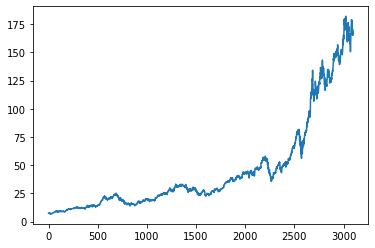

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3091    169.0472
3092    169.1725
3093    169.2199
3094    169.2604
3095    169.3203
Name: Close, Length: 3096, dtype: float64

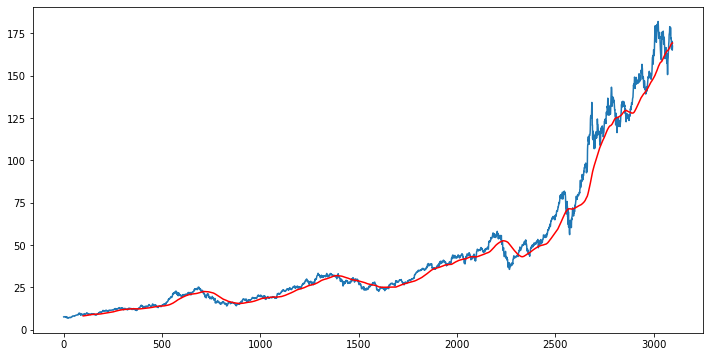

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'r')


In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3091    158.05675
3092    158.22710
3093    158.36875
3094    158.50775
3095    158.64495
Name: Close, Length: 3096, dtype: float64

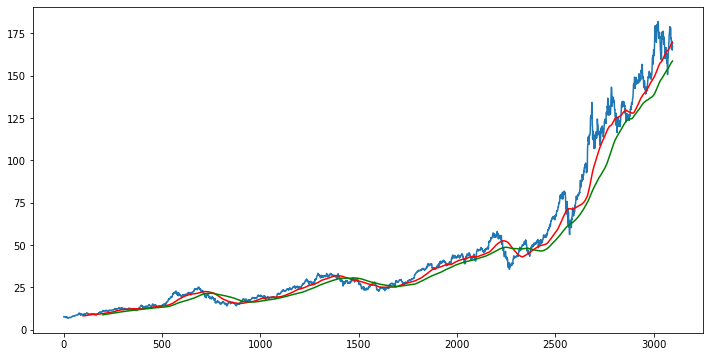

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'r')
plt.plot(ma200,'g')

In [11]:
# Splitting data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.60)])
data_testing = pd.DataFrame (df['Close'][int(len(df)*.60): int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(1857, 1)
(1239, 1)


In [12]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [13]:
data_testing.head()

,Close
1857,38.134998
1858,38.264999
1859,38.497501
1860,38.450001
1861,38.334999


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array



array([[0.02074055],
       [0.02438237],
       [0.02479319],
       ...,
       [0.99689106],
       [0.9951035 ],
       [0.95453279]])

In [16]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
 
x_train,y_train = np.array(x_train), np.array(y_train)


In [17]:
 x_train.shape


(1757, 100, 1)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 


In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
          input_shape = (x_train.shape[1], 1)))
model.add (Dropout (0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))

model.add (LSTM(units = 120, activation = 'relu'))
model.add(Dropout (0.5))

model.add(Dense(units = 1))




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100)


Epoch 1/100
55/55 [==============================] - 14s 172ms/step - loss: 0.0553
Epoch 2/100
55/55 [==============================] - 9s 171ms/step - loss: 0.0109
Epoch 3/100
55/55 [==============================] - 11s 200ms/step - loss: 0.0094
Epoch 4/100
55/55 [==============================] - 11s 195ms/step - loss: 0.0079
Epoch 5/100
55/55 [==============================] - 11s 196ms/step - loss: 0.0073
Epoch 6/100
55/55 [==============================] - 10s 174ms/step - loss: 0.0067
Epoch 7/100
55/55 [==============================] - 11s 198ms/step - loss: 0.0068
Epoch 8/100
55/55 [==============================] - 10s 180ms/step - loss: 0.0069
Epoch 9/100
55/55 [==============================] - 11s 194ms/step - loss: 0.0060
Epoch 10/100
55/55 [==============================] - 13s 226ms/step - loss: 0.0056
Epoch 11/100
55/55 [==============================] - 9s 172ms/step - loss: 0.0056
Epoch 12/100
55/55 [==============================] - 10s 181ms/step - loss: 0.0058
Epo

55/55 [==============================] - 12s 220ms/step - loss: 0.0019
Epoch 99/100
55/55 [==============================] - 11s 202ms/step - loss: 0.0019
Epoch 100/100
55/55 [==============================] - 12s 209ms/step - loss: 0.0019


In [22]:
model.save('keras_model.h5')

In [23]:
past_100_days = data_training.tail(100)

In [24]:
final_df = past_100_days.append (data_testing, ignore_index=True)

In [25]:
final_df.head()

,Close
0,29.072500
1,29.129999
2,29.315001
3,29.190001
4,29.182501


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(final_df)
input_data


array([[7.67699907e-04],
       [1.14337489e-03],
       [2.35209972e-03],
       ...,
       [8.90758212e-01],
       [8.89320912e-01],
       [9.04544111e-01]])

In [27]:
input_data.shape

(1339, 1)

In [28]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append (input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [29]:
x_test, y_test = np.array (x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1239, 100, 1)
(1239,)


In [30]:
#predictions 
y_predicted = model.predict(x_test)

In [31]:
y_test

array([0.05997843, 0.06082781, 0.06234688, ..., 0.89075821, 0.88932091,
       0.90454411])

In [32]:
y_predicted

array([[0.12883148],
       [0.12905312],
       [0.12927815],
       ...,
       [0.883289  ],
       [0.8776832 ],
       [0.87276065]], dtype=float32)

In [33]:
scaler.scale_

array([0.0065336])

In [34]:
scale_factor = 1/0.0065336
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor



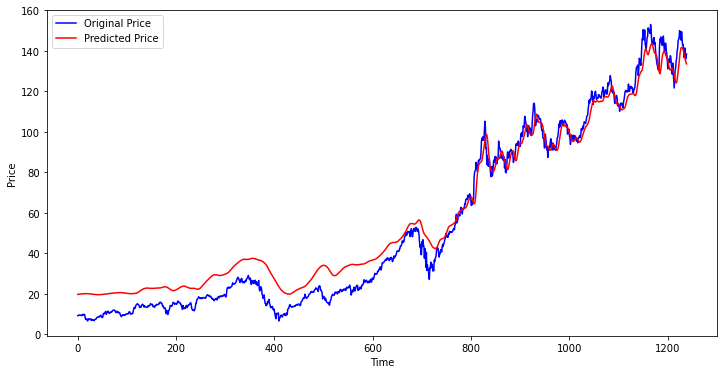

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend ()
plt.show()
